In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import string
import nltk, re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import tokenize
from collections import Counter
nltk.download("movie_reviews")
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
# Seld designed function for ngram
from Function.Function import base_wordpro

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/siuol456/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/siuol456/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/siuol456/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/siuol456/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
f = open('Toys_and_Games_5.json','r')

In [4]:
review_A = []
for line in open('Toys_and_Games_5.json', 'r'):
    review_A.append(json.loads(line))

In [5]:
df_test = pd.DataFrame(review_A)

In [6]:
df_test.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VXOAVRGKGEAK,0439893577,Angie,"[0, 0]",I like the item pricing. My granddaughter want...,5.0,Magnetic board,1390953600,"01 29, 2014"
1,A8R62G708TSCM,0439893577,Candace,"[1, 1]",Love the magnet easel... great for moving to d...,4.0,it works pretty good for moving to different a...,1395964800,"03 28, 2014"
2,A21KH420DK0ICA,0439893577,capemaychristy,"[1, 1]",Both sides are magnetic. A real plus when you...,5.0,love this!,1359331200,"01 28, 2013"
3,AR29QK6HPFYZ4,0439893577,dcrm,"[0, 0]",Bought one a few years ago for my daughter and...,5.0,Daughters love it,1391817600,"02 8, 2014"
4,ACCH8EOML6FN5,0439893577,DoyZ,"[1, 1]",I have a stainless steel refrigerator therefor...,4.0,Great to have so he can play with his alphabet...,1399248000,"05 5, 2014"


In [7]:
df_pre = df_test[['reviewText','overall']]
df_pre = df_pre.rename(columns={'reviewText':'review'})
df_pre['label'] = df_pre.overall.apply(lambda x: 'neg' if x<2.5 else 'pos')
df_pre.head()

,review,overall,lab
0,I like the item pricing. My granddaughter want...,5.0,pos
1,Love the magnet easel... great for moving to d...,4.0,pos
2,Both sides are magnetic. A real plus when you...,5.0,pos
3,Bought one a few years ago for my daughter and...,5.0,pos
4,I have a stainless steel refrigerator therefor...,4.0,pos


In [8]:
df_general = base_wordpro.lowerc(df_pre)
df_general = base_wordpro.removePunc(df_pre)
df_general = base_wordpro.removestop(df_pre)
df_general = base_wordpro.wordToken(df_pre)
df_general = base_wordpro.wordLemma(df_pre)
df_general.head()

,review,overall,lab,wordToken,review_lemmatized
0,like item pricing. granddaughter wanted mark w...,5.0,pos,"[like, item, pricing., granddaughter, wanted, ...","[like, item, pricing., granddaughter, wanted, ..."
1,love magnet easel... great moving different ar...,4.0,pos,"[love, magnet, easel..., great, moving, differ...","[love, magnet, easel..., great, moving, differ..."
2,sides magnetic. real plus entertaining one chi...,5.0,pos,"[sides, magnetic., real, plus, entertaining, o...","[side, magnetic., real, plus, entertaining, on..."
3,"bought one years ago daughter loves it, still ...",5.0,pos,"[bought, one, years, ago, daughter, loves, it,...","[bought, one, year, ago, daughter, love, it,, ..."
4,stainless steel refrigerator therefore much sp...,4.0,pos,"[stainless, steel, refrigerator, therefore, mu...","[stainless, steel, refrigerator, therefore, mu..."


Number of words: 357897


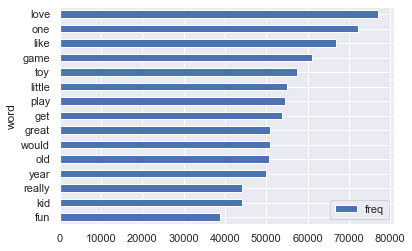

In [9]:
base_wordpro.wordFreqPlot(df_pre,lab = 'All',top=15)

In [10]:
df_sent = base_wordpro.lowerc(df_pre)
df_sent = base_wordpro.removePunc(df_pre)
df_sent = base_wordpro.wordToken(df_pre)
df_sent = base_wordpro.wordLemma(df_pre)
df_sent.head()

,review,overall,lab,wordToken,review_lemmatized
0,like item pricing. granddaughter wanted mark w...,5.0,pos,"[like, item, pricing., granddaughter, wanted, ...","[like, item, pricing., granddaughter, wanted, ..."
1,love magnet easel... great moving different ar...,4.0,pos,"[love, magnet, easel..., great, moving, differ...","[love, magnet, easel..., great, moving, differ..."
2,sides magnetic. real plus entertaining one chi...,5.0,pos,"[sides, magnetic., real, plus, entertaining, o...","[side, magnetic., real, plus, entertaining, on..."
3,"bought one years ago daughter loves it, still ...",5.0,pos,"[bought, one, years, ago, daughter, loves, it,...","[bought, one, year, ago, daughter, love, it,, ..."
4,stainless steel refrigerator therefore much sp...,4.0,pos,"[stainless, steel, refrigerator, therefore, mu...","[stainless, steel, refrigerator, therefore, mu..."


Number of negative words: 64324


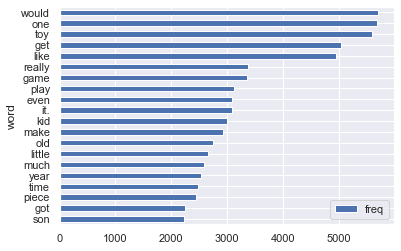

In [15]:
base_wordpro.wordFreqPlot(df_sent,lab = 'neg',top=20)

Number of positive words: 335956


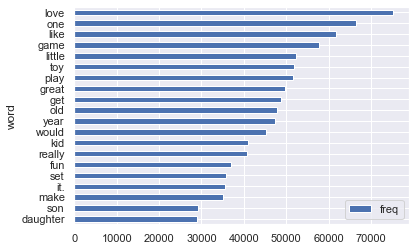

In [16]:
base_wordpro.wordFreqPlot(df_sent,lab = 'pos',top=20)